In [21]:
#@title Mounting my Google Drive and Set TORCH_HOME env
from google.colab import drive
import os
drive.mount('/content/drive')

os.environ['TORCH_HOME'] = '/content/drive/My Drive/DL_Class/deep-learning-v2-pytorch/project-dog-classification/output_models/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Images and return counts

In [84]:
import numpy as np
from glob import glob
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns


# load filenames for dog images
dog_files_test = np.array(glob("/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/*/*"))
dog_files_train = np.array(glob("/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/train/*/*"))
dog_files_valid = np.array(glob("/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/valid/*/*"))

# print number of images
print('There are %d total dog images.' % len(dog_files_test))
print('There are %d total dog images.' % len(dog_files_train))
print('There are %d total dog images.' % len(dog_files_valid))

There are 836 total dog images.
There are 6680 total dog images.
There are 835 total dog images.


Pull Random Set of Images for better visual analysisi

In [23]:
rando_doggo = np.random.choice(dog_files_test, size=8)
rando_doggo

array(['/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/065.Entlebucher_mountain_dog/Entlebucher_mountain_dog_04595.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03294.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/078.Great_dane/Great_dane_05363.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/115.Papillon/Papillon_07466.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/039.Bull_terrier/Bull_terrier_02775.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/109.Norwegian_elkhound/Norwegian_elkhound_07163.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/053.Cocker_spaniel/Cocker_spaniel_03740.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/092.Keeshond/Keeshond_06280.jpg'],
      dtype='<U14

Next two cells will visualize the selected images

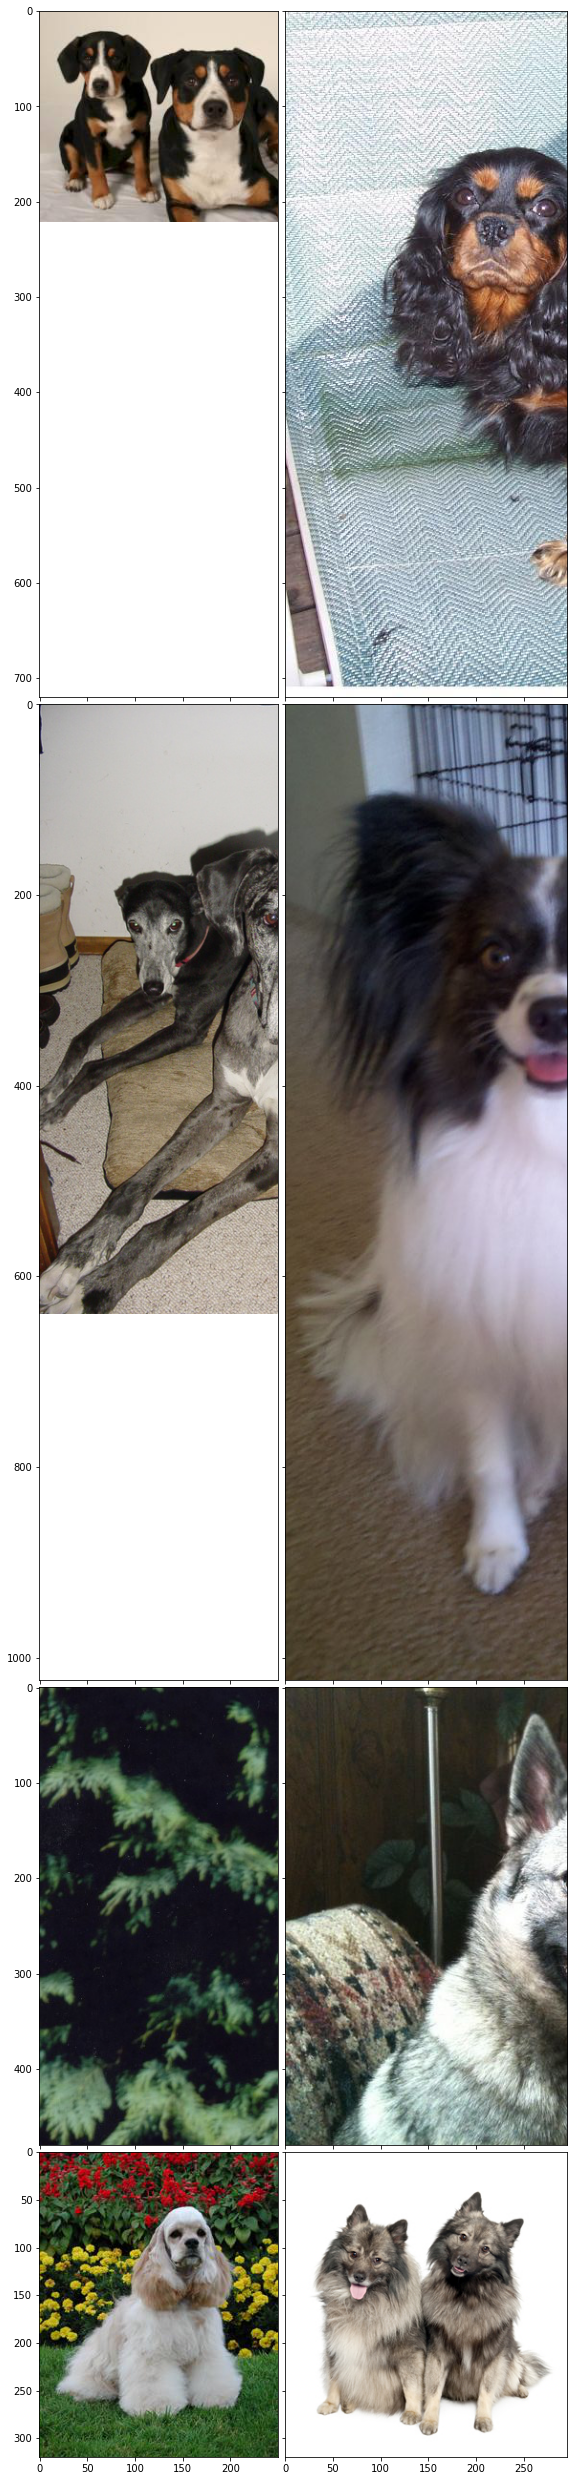

In [30]:
def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = np.asarray(img)
    return img

img_arr = []
for image in rando_doggo:
    img_arr.append(img_reshape(image))



fig = plt.figure(figsize=(45., 45.))
grid = ImageGrid(fig, 
                 121,
                 nrows_ncols=(4, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)

plt.show()

Inspect the size and channels of the images

In [29]:
imagesize = []
imageshape = []

for rds in rando_doggo:
  imgsize = Image.open(rds).convert('RGB')
  imagesize.append(imgsize.size)
  imgshape = cv2.imread(rds, cv2.IMREAD_UNCHANGED)
  imageshape.append(imgshape.shape[-1])

print(imagesize)
print(imageshape)

[(300, 222), (960, 720), (480, 640), (577, 1024), (800, 1126), (640, 480), (250, 333), (296, 320)]
[3, 3, 3, 3, 3, 3, 3, 3]


Produce Statistics on the training dataset

In [66]:
import os
import pandas as pd

def count_img_class(base_path):
    """
    function to count the number of images in a path given.
    Input:
    base_path: directory path

    Returns:
    dataframe: with "breed" "total_imgs" columns

    """
    
    df = pd.DataFrame([])
    totalDir = 0

    for base, dirs, files in os.walk(base_path):
        base_end = str(base).split('/')[-1]
        totalFiles = 0
        for Files in files:
            totalFiles += 1

        if totalFiles == 0:
          pass
        else:
          df = df.append(pd.DataFrame({'breed': base_end, 'total_imgs': totalFiles}, index=[0]), ignore_index=True) 
    return df


Look at the training dataset

In [67]:
df = count_img_class('/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/train/')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   breed       133 non-null    object
 1   total_imgs  133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [69]:
df['total_imgs'].describe()

count    133.000000
mean      50.225564
std       11.863885
min       26.000000
25%       42.000000
50%       50.000000
75%       61.000000
max       77.000000
Name: total_imgs, dtype: float64

In [76]:
print(f"The breed with the smallest sample set: {df.min()[0]} with {df.min()[-1]} total images.")
print(f"The breed with the largest sample set: {df.max()[0]} with {df.max()[-1]} total images.")
print(f"There is an average of {round(df['total_imgs'].mean(), 4)} images per breed sample set.")

The breed with the smallest sample set: 001.Affenpinscher with 26 total images.
The breed with the largest sample set: 133.Yorkshire_terrier with 77 total images.
There is an average of 50.2256 images per breed sample set.


Look at the test dataset

In [77]:
df_test = count_img_class("/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/")

In [97]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   breed       133 non-null    object
 1   total_imgs  133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,breed,total_imgs
0,084.Icelandic_sheepdog,50
1,092.Keeshond,44
2,110.Norwegian_lundehund,33
3,065.Entlebucher_mountain_dog,42
4,105.Neapolitan_mastiff,31


In [80]:
df_test['total_imgs'].describe()

count    133.000000
mean       6.285714
std        1.712571
min        3.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: total_imgs, dtype: float64

In [83]:
print(f"The breed with the smallest sample set: {df_test.min()[0]} with {df_test.min()[-1]} total images.")
print(f"The breed with the largest sample set: {df_test.max()[0]} with {df_test.max()[-1]} total images.")
print(f"There is an average of {round(df_test['total_imgs'].mean(), 4)} images per breed sample set.")
print(f"The Standard Deviation is {round(df_test['total_imgs'].std(),4)}")

The breed with the smallest sample set: 001.Affenpinscher with 3 total images.
The breed with the largest sample set: 133.Yorkshire_terrier with 10 total images.
There is an average of 6.2857 images per breed sample set.
The Standard Deviation is 1.7126


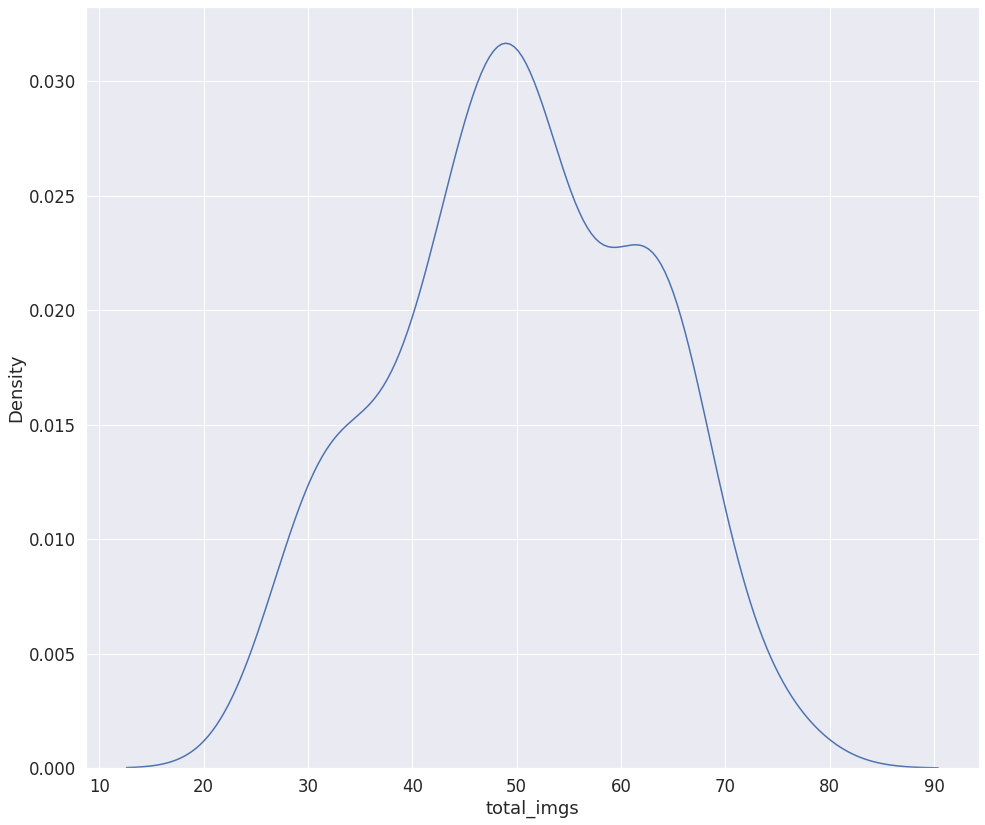

In [120]:

sns.set(rc={'figure.figsize':(16,14)}, font_scale=1.5)
sns.kdeplot(data=df.total_imgs);

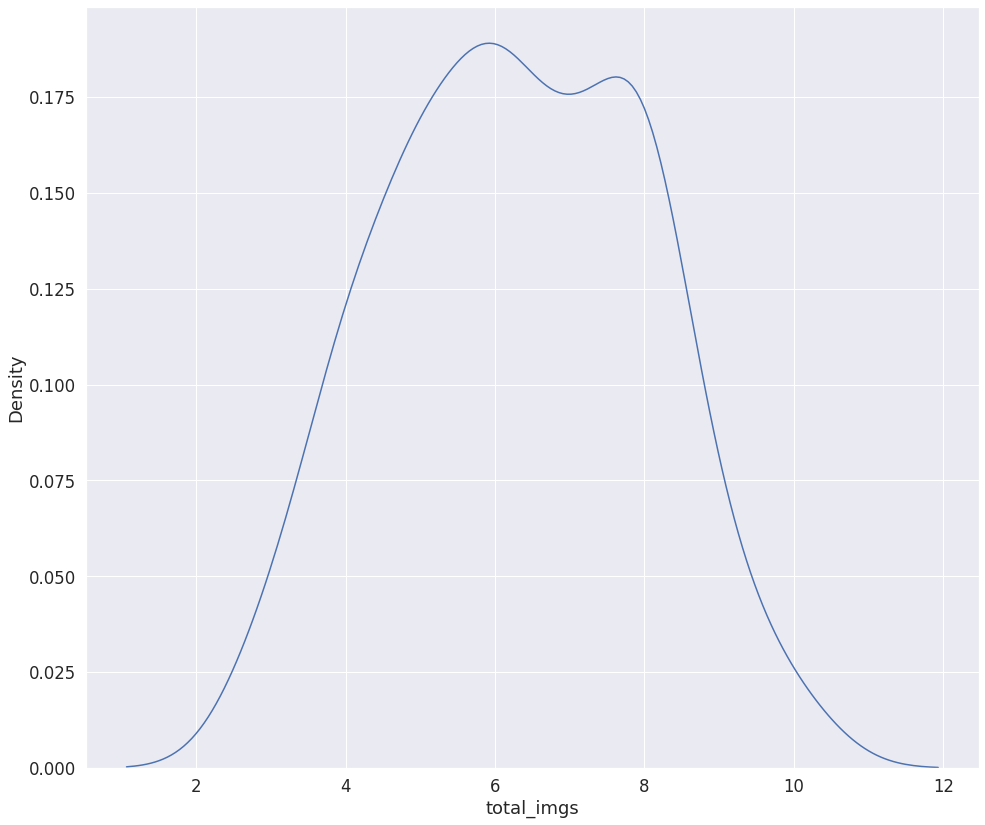

In [118]:
sns.set(rc={'figure.figsize':(16,14)}, font_scale=1.5)
sns.kdeplot(df_test.total_imgs);